<a href="https://colab.research.google.com/github/raminass/Software-Project/blob/pandas/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Rami Nasser (raminass@gmail.com), Yael Kupershmidt (kupershmidt@mail.tau.ac.il)


# Earlier

*   Numpy
*   Scipy
*   Matplotlib

# Today

*   Pandas









#Pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`


[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

##Setup

Install

In [ ]:
!pip install pandas

Import - External Package

In [ ]:
import pandas as pd

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

##Series

One way to create a `Series` is to construct a `Series` object. For example:

In [ ]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

## Creating Data

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
pd.DataFrame({'City name': city_names, 'Population': population })

Missing Values:

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 485199])
pd.DataFrame({'City name': city_names, 'Population': population})

A DataFrame is a table(excel sheet). It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

For example, consider the following simple DataFrame:

In [ ]:
pd.DataFrame({'A': [50, 21], 'B': [131, 2]})

The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an Index. We can assign values to it by using an index parameter in our constructor:

In [ ]:
# Student list
students = pd.DataFrame({'Name': ['Ross', 'Monica','Chandler'],
              'Last Name': ['Geller', 'Geller','Bing'],
              'GPA': ['98', '99','90']},
               index=['id1', 'id2','id3'])
students

In [ ]:
students['Name']['id1'] = 'Joey'
students

##Reading Data

Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

```csv
A,B,C,
30,21,9,
35,34,1,
41,11,11
```



So a CSV file is a table of values separated by commas. Hence the name: "Comma-Separated Values", or CSV.

Let's now set aside our toy datasets and see what a real dataset looks like when we read it into a DataFrame. We'll use the pd.read_csv() function to read the data into a DataFrame.

Reading from web directly:

In [ ]:
houses = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

We can use the shape attribute to check how large the resulting DataFrame is:



In [ ]:
print(houses.shape)
houses

We can examine the contents of the resultant DataFrame using the head()

command, which grabs the first five rows:

In [ ]:
# arg the desired number of rows
houses.head(8)

Statistical overview of the dataset:

In [ ]:
houses.describe()

Reading from local storage:

In [ ]:
! wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv
tips = pd.read_csv('tips.csv')

In [ ]:
tips.sample(5)

In [ ]:
tips[tips['day'] == 'Sat'].head(5)

##Accessing Data

Selecting specific values of a pandas DataFrame or Series to work on is an implicit step in almost any data operation you'll run, so one of the first things you need to learn in working with data in Python is how to go about selecting the data points relevant to you quickly and effectively.

Each column is a property of the dataframe object and we can get columns using Python property access:

In [ ]:
tips.total_bill

If we have a Python dictionary, we can access its values using the indexing ([]) operator. We can do the same with columns in a DataFrame:

In [ ]:
tips['total_bill']

These are the two ways of selecting a specific Series out of a DataFrame. Neither of them is more or less syntactically valid than the other, but the indexing operator [] does have the advantage that it can handle column names with reserved characters in them (e.g. if we had a total bill column, tips.total bill wouldn't work).

Doesn't a pandas Series look kind of like a fancy dictionary? It pretty much is, so it's no surprise that, to drill down to a single specific value, we need only use the indexing operator [] once more:

In [ ]:
type(tips['time'])

In [ ]:
tips['time'][200]

In [ ]:
tips['time'].unique()

## Indexing

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, loc and iloc. For more advanced operations, these are the ones you're supposed to be using.

Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. iloc follows this paradigm.

To select the second last row of data in a DataFrame, we may use the following:

In [ ]:
tips[-2]

In [ ]:
tips.iloc[-2]

Both loc and iloc are row-first, column-second.
To get a column with iloc, we can do the following:

In [ ]:
tips.iloc[:,0]

select rows and columns:

In [ ]:
tips.iloc[103:107,0]

Label-based selection.
The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.




In [ ]:
tips.loc[103:107,'tip']

Change the index


In [ ]:
df = tips.set_index('day')

In [ ]:
df.sample(7)

In [ ]:
df.loc['Sun','total_bill']

More info in the documentation [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
tips.head()

In [ ]:
tips['new_calc'] = tips.total_bill / 10

In [ ]:
tips.head()

Operation between columns:

In [ ]:
tips.tip / tips.total_bill

calculating new column:

In [ ]:
import numpy as np
tips['log_total'] = np.log(tips['total_bill'])

In [ ]:
tips.head(5)

summarizing data

In [ ]:
tips.tip.value_counts()

##Filtering

So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do interesting things with the data, however, we often need to ask questions based on conditions.

For example, suppose that we're interested specifically in lunch times.


In [ ]:
tips[tips['time'] == 'Lunch']

If we want to ask more questions, for example parties that had lunch and paid a tip higher than 5, we can use the 'and' operator:

In [ ]:
tips[(tips['time'] == 'Lunch') & (tips['tip'] > 5)]

We can build any query that concerns us as in any database, this can be achieved using basic conditional operators (and, or ...)

For multiple selection instead of using many 'or' operators we use isin() function that pandas provide:

In [ ]:
tips[(tips['size'].isin([2, 3])) & (tips['tip'] > 5)]

Data cleaning, in modern apps and researches many time we have missing data due to technical or buisiness issues, in clinical research patient might not answer some question, it's up to the researcher to decide how to handle missing data(this is a topic in ML).
Naive way is to drop missings and it's provided by Pandas:

In [ ]:
# we also can drop by specific column(see documentation)
tips.dropna()

## Grouping and Sorting


In addition to aggregation built-ins (count(), sum(), nunique()…) we can group the data based on splitting the values of some index, then apply a calculation on it and presenting it the result in a combined matter:







In [ ]:
avg_tip = tips.groupby(['smoker']).tip.mean()
avg_tip

In [ ]:
avg_tip = tips.groupby(['day']).tip.mean()
avg_tip.sort_values(ascending=False)

Now, who is the higher payer?
Sorting dataset by the tip:


Sort by column to get the highest tipper:

In [ ]:
tips.sort_values(by='tip', ascending=False)

Multiple group by:

In [ ]:
tips.groupby(['smoker','day']).tip.mean()

## Combining Data

In [ ]:
!pip install Faker
from faker import Faker
fake = Faker()

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
ids = np.random.randint(1000, 2000, 10)
names = [fake.name() for i in range(10)]
ages = np.random.randint(18, 70, 10)
address = [fake.address() for i in range(10)]
company = [fake.company() for i in range(10)]
df_customer = pd.DataFrame({
    'id': ids,
    'name': names,
})
df_info = pd.DataFrame({
    'id': ids[:8],
    'age': ages[:8],
    'address': address[:8],
    'company': company[:8]
})

In [ ]:
df_customer

In [ ]:
df_info

### Join/Merge

Combining columns from different dataframes based on a key:


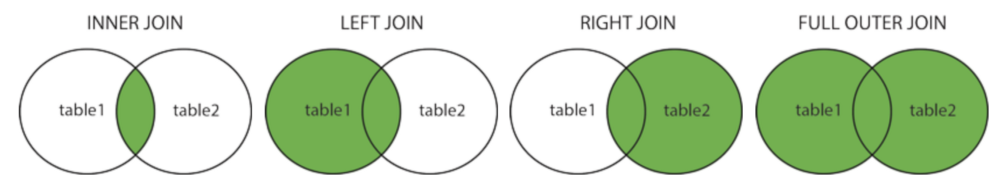

In [ ]:
pd.merge(df_customer, df_info, on='id')

In [ ]:
pd.merge(df_customer, df_info, how='left', on='id')

### Union

Assuming we have another store with it's clients as follow:

In [ ]:
ids = np.random.randint(1000, 2000, 4)
names = [fake.name() for i in range(4)]
df_customer_1 = pd.DataFrame({
    'id': ids,
    'name': names,
})

In [ ]:
df_customer_1

We want to combine the **rows** of both tables to one table, this is called union in SQL and concat in Python:

In [ ]:
pd.concat([df_customer, df_customer_1])
#.loc[2], iloc[2]


## Apply

 Manipulate columns and rows in a DataFrame with custom functions.

In [ ]:
csv_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
df = pd.read_csv(csv_url)
df.head()

For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [ ]:
stud_alcoh = df.loc[: , "school":"guardian"]
stud_alcoh.head()

Create a lambda function that will capitalize strings.

In [ ]:
capitalizer = lambda x: x.capitalize()

Capitalize both Mjob and Fjob

In [ ]:
stud_alcoh['Mjob'] = stud_alcoh['Mjob'].apply(capitalizer)
stud_alcoh['Fjob'] = stud_alcoh['Fjob'].apply(capitalizer)

In [ ]:
stud_alcoh.head()

Create a function called majority that returns a boolean value to a new column called legal_drinker (Consider majority as older than 17 years old)

In [ ]:
def majority(x):
    if x > 17:
        return True
    else:
        return False

In [ ]:
stud_alcoh['legal_drinker'] = stud_alcoh['age'].apply(majority)
stud_alcoh.head()

Apply multiple columns

In [ ]:
def f(x):
   return (x['G1'] + x['G2'] + x['G3']) / 3

In [ ]:
df.apply(f, axis=1)

In [ ]:
def f1(a, b, c):
   return (a + b + c) / 3

In [ ]:
df.apply(lambda x: f1(x['G1'], x['G2'], x['G3']), axis=1)

In [ ]:
df[['G1','G2','G3']].apply(lambda x: f1(*x), axis=1)

#Matplotlib

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

##Plotting

In [ ]:
lunch_tips = tips[tips.time == 'Lunch'].sort_values(by='total_bill')
lunch_tips.head()

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(lunch_tips['total_bill'], lunch_tips['tip'])

##Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

In [ ]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.figure(figsize=(12,14))

# Make the first plot
plt.subplot(3, 1, 1)
plt.scatter(tips['day'].astype(str), tips['total_bill'])
plt.title('Bills per day')

# Set the second subplot as active, and make the second plot.
plt.subplot(3, 1, 2)
plt.scatter(tips['day'].astype(str), tips['tip'])
plt.title('Tips per day')

# Set the second subplot as active, and make the second plot.
plt.subplot(3, 1, 3)
plt.scatter(tips['day'].astype(str), tips['total_bill'] / tips['tip'])
plt.title('Tip proportion')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).